## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np

In [2]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
data = housing["data"]
print(data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
target = housing.target
print(target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
feature_names = housing.feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
X = pd.DataFrame(data, columns=feature_names)
X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y = pd.DataFrame(target, columns=['price'])
y.head(10)

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414
8,2.267
9,2.611


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)

In [19]:
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [23]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [26]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [28]:
X_train_tsne

array([[-30.150822,  24.928984],
       [-46.45935 , -41.216457],
       [  5.17058 ,  21.973925],
       ...,
       [-46.20789 ,  -8.203756],
       [ 69.24879 ,   8.172289],
       [ 23.58707 , -84.881   ]], dtype=float32)

In [29]:
X_train_tsne.shape

(16512, 2)

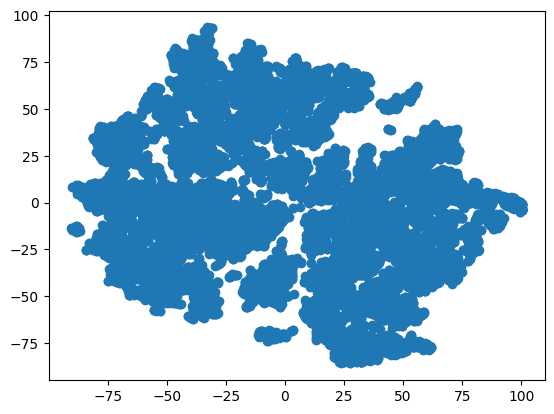

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price в разных кластерах.


In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=3)

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [39]:
pd.value_counts(labels_train)

0    9510
1    6937
2      65
dtype: int64

In [40]:
labels_test = kmeans.fit_predict(X_test_scaled)

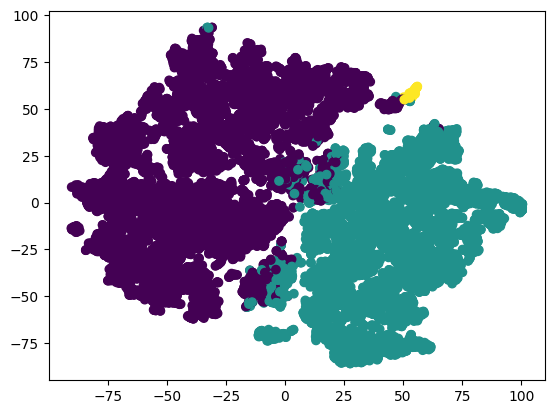

In [42]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [43]:
y_train.mean()

price    2.071947
dtype: float64

In [44]:
y_train[labels_train==0].mean()

price    2.142137
dtype: float64

In [45]:
y_train[labels_train==1].mean()

price    1.979968
dtype: float64

In [46]:
y_train[labels_train==2].mean()

price    1.618831
dtype: float64

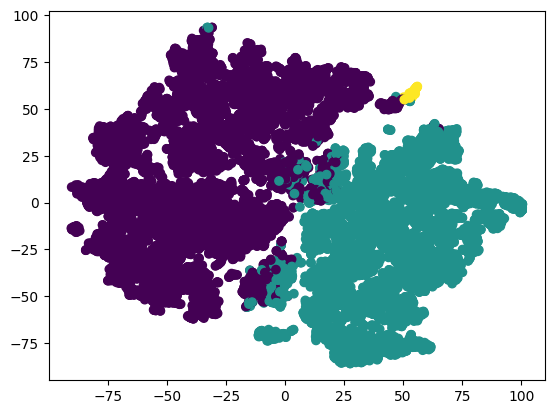

In [48]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()